# Calculadora de Dividendos

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def simulate_dividend_reinvestment(ticker, initial_investment, start_date):
    # Obter dados da ação
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date)
    dividends = stock.dividends

    # Inicializando variáveis
    shares = initial_investment // hist['Close'].iloc[0]
    cash = initial_investment % hist['Close'].iloc[0]
    dates = hist.index
    share_count = []

    for date in dates:
        # Verificar se há pagamento de dividendos neste dia
        if date in dividends.index:
            # Calcular o total de dividendos recebidos
            dividend_per_share = dividends.loc[date]
            total_dividends = dividend_per_share * shares

            # Reinvestir dividendos comprando mais ações
            additional_shares = total_dividends // hist['Close'][date]
            cash += total_dividends % hist['Close'][date]

            # Atualizar número de ações
            shares += additional_shares

        # Armazenar número de ações para esta data
        share_count.append(shares)

    ticker_name = ticker.split('.')[0]
    # Criar DataFrame com os resultados
    results = pd.DataFrame({'Date': dates, ticker_name: share_count})
    results.set_index('Date', inplace=True)

    return results
def portfolio_value(stocks, start_date):
    """
    Calculates the value of a portfolio of stocks over time, starting from a given date.

    Parameters:
    stocks (pd.DataFrame): A DataFrame where each column represents the number of shares held for a specific stock.
    start_date (str): The start date for calculating the portfolio value in 'YYYY-MM-DD' format.

    This function performs the following steps:
    1. Creates a copy of the input DataFrame to avoid modifying the original data.
    2. Iterates over each column in the DataFrame, treating each column name as a stock ticker.
    3. Appends '.SA' to each ticker to fetch Brazilian market closing prices using the `yfinance` library.
    4. Retrieves historical closing prices for each stock starting from the given date.
    5. Multiplies the number of shares by the corresponding closing prices to compute the value of each stock over time.

    Returns:
    pd.DataFrame: A DataFrame containing the portfolio value for each stock over time.

    Notes:
    - The function uses the `yfinance` library to fetch historical stock prices.
    - The input DataFrame `stocks` should have stock tickers as column names and dates as the index.
    - The closing prices are multiplied by the number of shares to compute the value of each stock in the portfolio.
    """
    value = stocks.copy()  # Create a copy of the DataFrame tickers

    # Get closing prices for each ticker and date
    for column in value.columns:  # Iterate over all columns except the first (which contains the dates)
        stock = yf.Ticker(column + '.SA')  # Add .SA to the ticker to get closing prices from the Brazilian market
        hist = stock.history(start=start_date)['Close']  # Get closing prices from the start date
        value[column] *= hist.values  # Multiply the number of shares by the closing price

    return value
# Function to calculate the return of a given wallet
def wallet_return(initial_investment, start_date, tickers, title):
    """
    Simulates the return on investment for a portfolio of stocks, with dividend reinvestment, from a given start date.

    Parameters:
    initial_investment (float): The initial amount of money invested in each stock.
    start_date (str): The start date for the investment in 'YYYY-MM-DD' format.
    tickers (list of str): A list of stock tickers to include in the portfolio.

    This function performs the following steps:
    1. Simulates dividend reinvestment for each stock in the `tickers` list from the given start date.
    2. Concatenates the resulting dataframes into a single dataframe.
    3. Computes the total portfolio value over time.
    4. Plots the performance of each stock in the portfolio over time, excluding the total portfolio value.

    Returns:
    None

    Notes:
    - The function assumes that `simulate_dividend_reinvestment` and `portfolio_value` are defined elsewhere.
    - The function uses matplotlib to generate a plot of stock performance.
    - The portfolio value is calculated by summing up the values of individual stocks.
    - The total portfolio value is excluded from the plot to focus on individual stock performance.
    """
    stocks_dfs = []

    for ticker in tickers:
        result = simulate_dividend_reinvestment(ticker, initial_investment, start_date).fillna(0).astype(int)
        stocks_dfs.append(result)

    stocks = pd.concat(stocks_dfs, axis=1)
    portfolio = portfolio_value(stocks, start_date)
    portfolio['Total'] = portfolio.sum(axis=1)

    # Selecting relevant columns
    df_plot = portfolio.drop(columns=['Total'])

    # Plotting
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    for col in df_plot.columns:
        plt.plot(df_plot.index, df_plot[col], label=col)

    # Adding title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()

## FIIs

In [18]:
each_stock = 100000
start_date = '2023-01-01'
dd_mm_yyyy = datetime.strptime(start_date, "%Y-%m-%d").strftime("%d/%m/%Y")

### FIIs de Logística

Esses fundos investem principalmente em galpões logísticos, que são imóveis destinados a armazenamento e distribuição de mercadorias.

* **HGLG11 - CSHG Logística**: Focado em imóveis logísticos bem localizados e diversificados, com contratos de locação de longo prazo.
* **LVBI11 - VBI Logístico**: Investe em galpões logísticos modernos e estrategicamente posicionados próximos a centros urbanos.
* **VILG11 - Vinci Logística**: Focado em ativos logísticos de alta qualidade, com ênfase em contratos atípicos de longo prazo.
* **GARE11 - Guardian Logística**: Investe em imóveis logísticos, buscando diversificação geográfica e de inquilinos.
* **SPXS11 - SPX Logística**: Também focado em imóveis logísticos, procurando boas localizações e contratos duradouros.

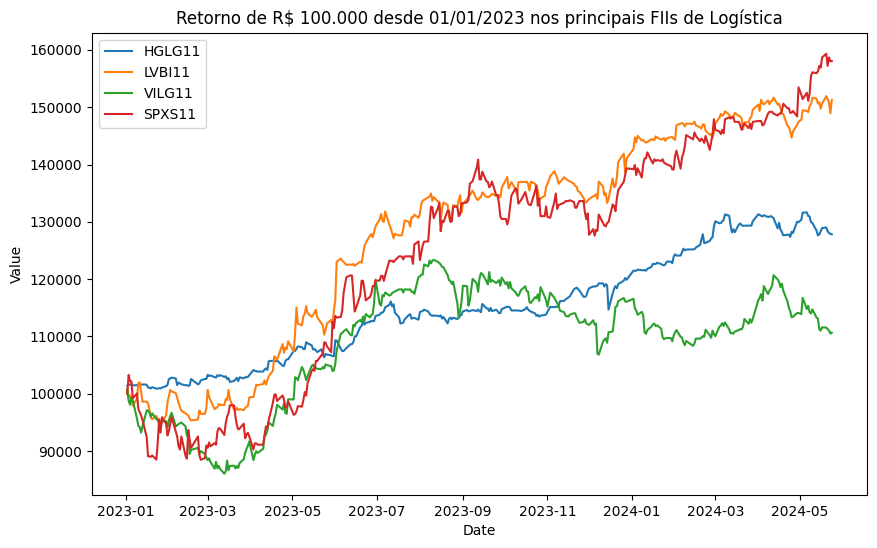

In [19]:
tickers = [
    'HGLG11.SA',
    'LVBI11.SA',
    'VILG11.SA',
    #'GARE11',
    'SPXS11.SA'
    ]

title = f'Retorno de R$ 100.000 desde {dd_mm_yyyy} nos principais FIIs de Logística'
wallet_return(each_stock, start_date, tickers, title)

### FIIs de Shoppings

Esses fundos investem em shopping centers, focando na geração de renda a partir de aluguéis comerciais.

* **HGBS11 - Hedge Brasil Shopping**: Investe em shoppings centers, buscando diversificação geográfica e de inquilinos.
* **HSML11 - HSI Malls**: Focado em shoppings centers, com atenção a propriedades em boas localizações.
* **XPML11 - XP Malls**: Investido em uma carteira diversificada de shoppings, buscando boas oportunidades de crescimento de renda.

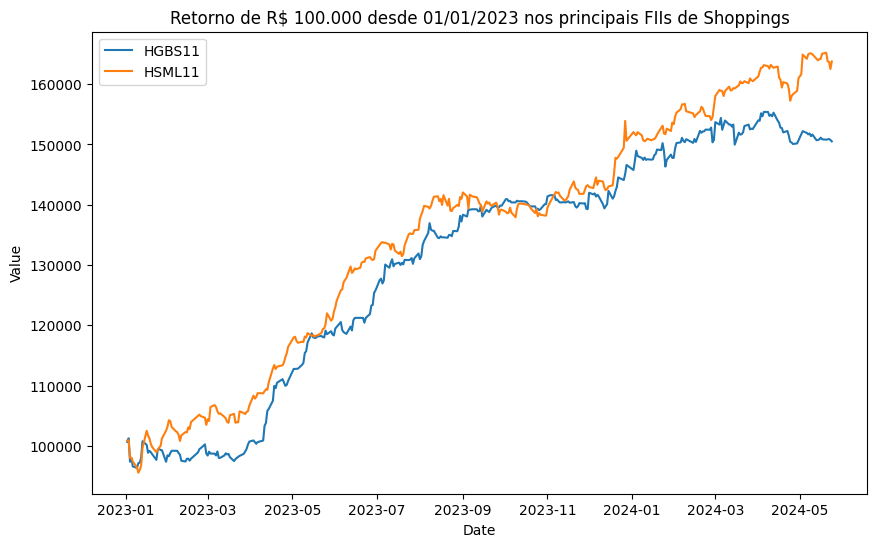

In [21]:
tickers = [
    'HGBS11.SA',
    #'HSML11.SA',
    'HSML11.SA',
    ]

title = f'Retorno de R$ 100.000 desde {dd_mm_yyyy} nos principais FIIs de Shoppings'
wallet_return(each_stock, start_date, tickers, title)

### FIIs de Lajes Corporativas
Esses fundos investem em edifícios de escritórios, geralmente localizados em grandes centros urbanos.

* **HGPO11 - CSHG Prime Offices**: Focado em lajes corporativas de alto padrão, com imóveis bem localizados.
* **RCRB11 - Rio Bravo Renda Corporativa**: Investe em lajes corporativas, buscando imóveis de qualidade em regiões prime.
* **TRXF11 - TRX Real Estate**: Além de lajes corporativas, investe em imóveis comerciais e industriais

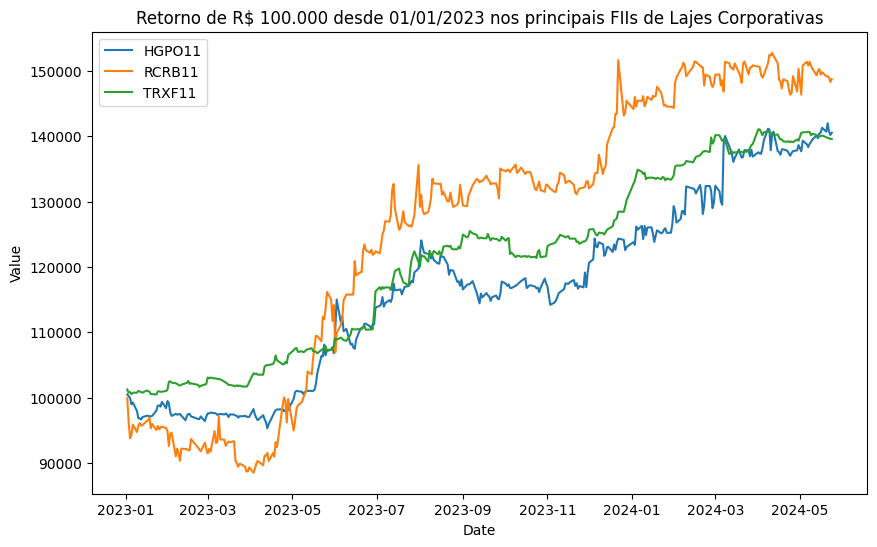

In [22]:
tickers = [
    'HGPO11.SA',
    'RCRB11.SA',
    'TRXF11.SA',
    ]

title = f'Retorno de R$ 100.000 desde {dd_mm_yyyy} nos principais FIIs de Lajes Corporativas'
wallet_return(each_stock, start_date, tickers, title)

### FIIs de Recebíveis Imobiliários
Esses fundos investem em Certificados de Recebíveis Imobiliários (CRIs), que são títulos de dívida lastreados em operações do mercado imobiliário.

* **VCJR11 - Vectis Juros Real**: Focado em CRIs, buscando diversificação e segurança nos recebíveis.
* **CPTS11 - Capitânia Securities II**: Investe em CRIs de alta qualidade, com uma carteira bem diversificada.
* **CVBI11 - VBI CRI**: Especializado em CRIs, com foco em títulos de boa qualidade e diversificação de risco.
* **AFHI11 - AF Invest CRI**: Outro fundo focado em CRIs, buscando retornos consistentes e gestão de risco.
* **RBRY11 - RBR Crédito Imobiliário**: Investe principalmente em CRIs, buscando diversificação e retorno ajustado ao risco.

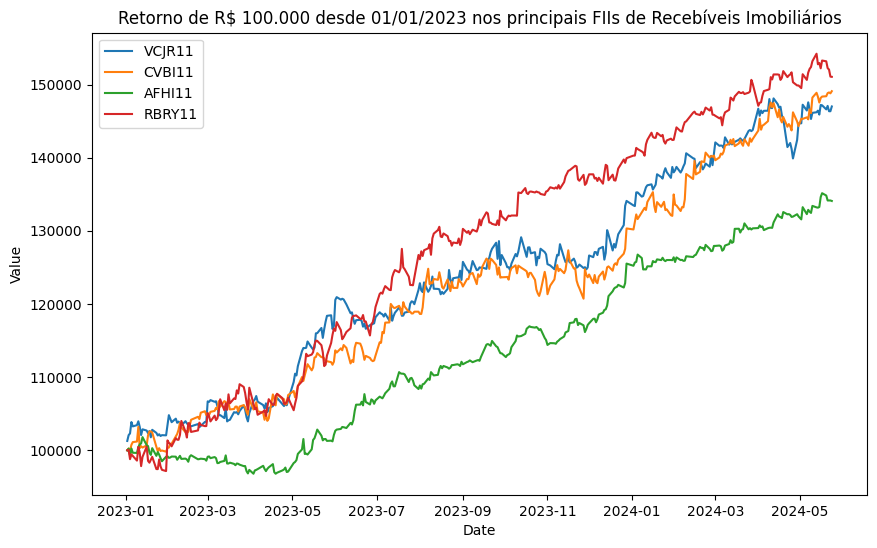

In [24]:
tickers = [
    'VCJR11.SA',
    #'CPTS11.SA',
    'CVBI11.SA',
    'AFHI11.SA',
    'RBRY11.SA',
    ]

title = f'Retorno de R$ 100.000 desde {dd_mm_yyyy} nos principais FIIs de Recebíveis Imobiliários'
wallet_return(each_stock, start_date, tickers, title)

### FIIs Diversificados
Esses fundos possuem uma estratégia diversificada, investindo em diferentes tipos de imóveis e recebíveis.

* **JSRE11 - JS Real Estate Multigestão**: Diversificado entre lajes corporativas, recebíveis e outros tipos de imóveis.
* **RBRF11 - RBR Alpha Multiestratégia**: FII de fundos de fundos, diversificado entre diferentes estratégias e tipos de ativos.
* **RBRP11 - RBR Properties**: Investe em lajes corporativas, imóveis comerciais e recebíveis imobiliários.
* **TGAR11 - TG Ativo Real**: Diversificado, incluindo desenvolvimento imobiliário e imóveis para renda.
* **JSAF11 - JS Ativos Financeiros**: FII de fundos de fundos, buscando diversificação em diferentes setores e ativos.
* **KNSC11 - Kinea Securities**: Outro fundo de fundos, investindo em uma variedade de FIIs para obter diversificação.

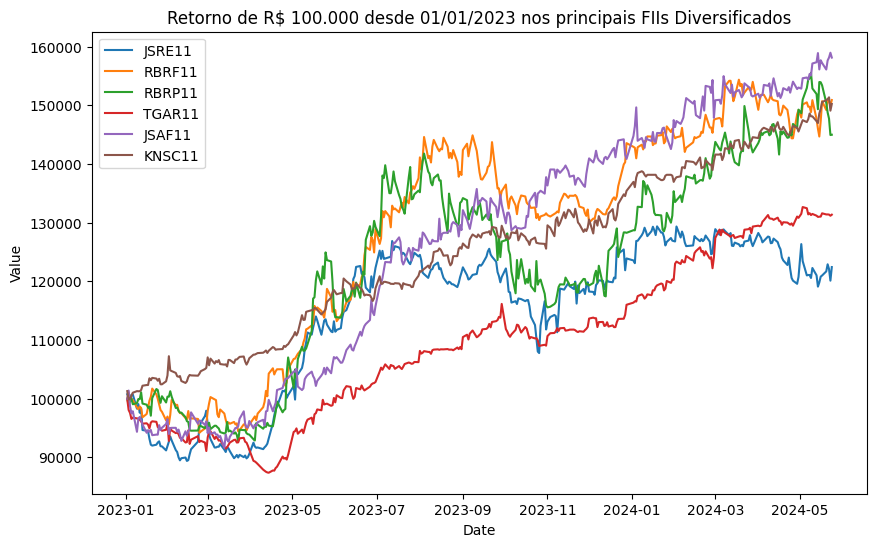

In [25]:
tickers = [
    'JSRE11.SA',
    'RBRF11.SA',
    'RBRP11.SA',
    'TGAR11.SA',
    'JSAF11.SA',
    'KNSC11.SA',
    ]

title = f'Retorno de R$ 100.000 desde {dd_mm_yyyy} nos principais FIIs Diversificados'
wallet_return(each_stock, start_date, tickers, title)

In [163]:
import yfinance as yf

empresa = yf.Ticker('PETR4.SA')

In [164]:
actions = empresa.actions
#analyst_price_target = empresa.analyst_price_target
balance_sheet = empresa.balance_sheet
balancesheet = empresa.balancesheet
basic_info = empresa.basic_info
calendar = empresa.calendar
capital_gains = empresa.capital_gains
cash_flow = empresa.cash_flow
cashflow = empresa.cashflow
dividends = empresa.dividends
#earnings = empresa.earnings
earnings_dates = empresa.earnings_dates
#earnings_forecasts = empresa.earnings_forecasts
#earnings_trend = empresa.earnings_trend
fast_info = empresa.fast_info
financials = empresa.financials
get_actions = empresa.get_actions
get_analyst_price_target = empresa.get_analyst_price_target
get_balance_sheet = empresa.get_balance_sheet
get_balancesheet = empresa.get_balancesheet
get_calendar = empresa.get_calendar
get_capital_gains = empresa.get_capital_gains
get_cash_flow = empresa.get_cash_flow
get_cashflow = empresa.get_cashflow
get_dividends = empresa.get_dividends
get_earnings = empresa.get_earnings
get_earnings_dates = empresa.get_earnings_dates
get_earnings_forecast = empresa.get_earnings_forecast
get_earnings_trend = empresa.get_earnings_trend
get_fast_info = empresa.get_fast_info
get_financials = empresa.get_financials
get_history_metadata = empresa.get_history_metadata
get_income_stmt = empresa.get_income_stmt
get_incomestmt = empresa.get_incomestmt
get_info = empresa.get_info
get_insider_purchases = empresa.get_insider_purchases
get_insider_roster_holders = empresa.get_insider_roster_holders
get_insider_transactions = empresa.get_insider_transactions
get_institutional_holders = empresa.get_institutional_holders
get_isin = empresa.get_isin
get_major_holders = empresa.get_major_holders
get_mutualfund_holders = empresa.get_mutualfund_holders
get_news = empresa.get_news
get_recommendations = empresa.get_recommendations
get_recommendations_summary = empresa.get_recommendations_summary
get_rev_forecast = empresa.get_rev_forecast
get_shares = empresa.get_shares
get_shares_full = empresa.get_shares_full
get_splits = empresa.get_splits
get_sustainability = empresa.get_sustainability
get_trend_details = empresa.get_trend_details
get_upgrades_downgrades = empresa.get_upgrades_downgrades
history = empresa.history
history_metadata = empresa.history_metadata
income_stmt = empresa.income_stmt
incomestmt = empresa.incomestmt
info = empresa.info
#insider_purchases = empresa.insider_purchases
#insider_roster_holders = empresa.insider_roster_holders
#insider_transactions = empresa.insider_transactions
institutional_holders = empresa.institutional_holders
isin = empresa.isin
major_holders = empresa.major_holders
mutualfund_holders = empresa.mutualfund_holders
news = empresa.news
option_chain = empresa.option_chain
options = empresa.options
proxy = empresa.proxy
quarterly_balance_sheet = empresa.quarterly_balance_sheet
quarterly_balancesheet = empresa.quarterly_balancesheet
quarterly_cash_flow = empresa.quarterly_cash_flow
quarterly_cashflow = empresa.quarterly_cashflow
#quarterly_earnings = empresa.quarterly_earnings
quarterly_financials = empresa.quarterly_financials
quarterly_income_stmt = empresa.quarterly_income_stmt
quarterly_incomestmt = empresa.quarterly_incomestmt
recommendations = empresa.recommendations
recommendations_summary = empresa.recommendations_summary
#revenue_forecasts = empresa.revenue_forecasts
session = empresa.session
#shares = empresa.shares
splits = empresa.splits
#sustainability = empresa.sustainability
ticker = empresa.ticker
#trend_details = empresa.trend_details
#upgrades_downgrades = empresa.upgrades_downgrades

YFinanceDataException: Failed to parse holders json data.

In [ ]:
# Dataframes provided
not_dataframes = [
    'basic_info', 'calendar', 'earnings_dates', 'get_actions', 'get_analyst_price_target',
    'get_balance_sheet', 'get_balancesheet', 'get_calendar', 'get_capital_gains',
    'get_cash_flow', 'get_cashflow', 'get_dividends', 'get_earnings', 'get_earnings_dates',
    'get_earnings_forecast', 'get_earnings_trend', 'get_fast_info', 'get_financials',
    'get_history_metadata', 'get_income_stmt', 'get_incomestmt', 'get_info',
    'get_insider_purchases', 'get_insider_roster_holders', 'get_insider_transactions',
    'get_institutional_holders', 'get_isin', 'get_major_holders', 'get_mutualfund_holders',
    'get_news', 'get_recommendations', 'get_recommendations_summary', 'get_rev_forecast',
    'get_shares', 'get_shares_full', 'get_splits', 'get_sustainability', 'get_trend_details',
    'get_upgrades_downgrades', 'history', 'history_metadata', 'info', 'isin', 'news',
    'option_chain', 'options', 'proxy', 'session', 'ticker'
]

In [ ]:
# List of dataframes
dataframes = [
    actions, balance_sheet, balancesheet, capital_gains, cash_flow, cashflow,
    dividends, financials, institutional_holders, major_holders, mutualfund_holders,
    quarterly_balance_sheet, quarterly_balancesheet, quarterly_cash_flow,
    quarterly_cashflow, quarterly_financials, quarterly_income_stmt, quarterly_incomestmt,
    recommendations, recommendations_summary, splits
]

# List of dataframe names
dataframe_names = [
    'actions', 'balance_sheet', 'balancesheet', 'capital_gains', 'cash_flow', 'cashflow',
    'dividends', 'financials', 'institutional_holders', 'major_holders', 'mutualfund_holders',
    'quarterly_balance_sheet', 'quarterly_balancesheet', 'quarterly_cash_flow',
    'quarterly_cashflow', 'quarterly_financials', 'quarterly_income_stmt', 'quarterly_incomestmt',
    'recommendations', 'recommendations_summary', 'splits'
]

# Create a dictionary mapping dataframe names to their corresponding dataframes
dataframes_dict = {name: df for name, df in zip(dataframe_names, dataframes)}

# Loop through each dataframe to check if it has non-zero shape
for name, df in dataframes_dict.items():
    if df is not None and df.shape != (0, 0):
        print(f"{name} has shape {df.shape}.")
    else:
        continue



actions has shape (28, 2).
capital_gains has shape (0,).
dividends has shape (27,).
major_holders has shape (4, 1).
splits has shape (1,).


In [162]:
actions   

,Dividends,Stock Splits
Date,,
2017-05-17 00:00:00-03:00,0.000000,10.0
2017-11-01 00:00:00-02:00,0.059166,0.0
2017-12-01 00:00:00-02:00,0.059166,0.0
2022-05-02 00:00:00-03:00,0.108471,0.0
2022-06-01 00:00:00-03:00,0.108471,0.0
2022-07-01 00:00:00-03:00,0.098610,0.0
2022-08-01 00:00:00-03:00,0.118332,0.0
2022-09-01 00:00:00-03:00,0.108471,0.0
2022-10-03 00:00:00-03:00,0.098610,0.0
